In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer
Cancer = load_breast_cancer()

In [3]:
from sklearn.tree import export_graphviz

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(Cancer.data, Cancer.target, stratify= Cancer.target, random_state = 42)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [8]:
print ("accuracy on training set: %f" % tree.score(X_train, Y_train))
print ("accuracy on test set: %f" % tree.score(X_test, Y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.937063


In [9]:
# to apply pre-pruning to the tree, which will stop developing the tree
# before we perfectly fit the data.
# on possible way is to stop building the tree after a certain depth has been
# reached. Here we set max_depth = 4, meaning only 4 consecutive questions can be
# asked.

tree = DecisionTreeClassifier(max_depth = 4, random_state = 0)
tree.fit(X_train, Y_train)

print ("accuracy on training set: %f" % tree.score(X_train, Y_train))
print ("accuracy on test set: %f" % tree.score(X_test, Y_test))

accuracy on training set: 0.988263
accuracy on test set: 0.951049


In [14]:
# Analyzing decision tree
# we can visualize the tree using the export_graphviz function from the tree module.

from sklearn.tree import export_graphviz
graphviz = export_graphviz()
export_graphviz(tree, out_file = "mytree.dot", class_names = ['malignant', 'benign'],
               feature_names = Cancer.feature_names, impurity = False, filled = True)

TypeError: export_graphviz() missing 1 required positional argument: 'decision_tree'

In [18]:
#with open("mytree.dot") as f:
 #   dot_graph = f.read()
help (tree)  

Help on DecisionTreeClassifier in module sklearn.tree.tree object:

class DecisionTreeClassifier(BaseDecisionTree, sklearn.base.ClassifierMixin)
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : string, optional (default="best")
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_features : int, float, string or None, optional (default=None)
 |      The number of features to consider when looking for the best split:
 |  
 |          - If int, then consider `max_features` features at each split.
 |          - If float, then `max_features` is a percentage and
 

In [22]:
# instead of looking at the whole tree, which can be taxing, there are some
# useful statistics that we can derive properties that we can derive to 
# summarize the working of the tree. The most commonly used summary is 
# feature importance

tree.feature_importances_

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.01019737,  0.04839825,  0.        ,  0.        ,  0.0024156 ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.72682851,  0.0458159 ,  0.        ,  0.        ,  0.0141577 ,
        0.        ,  0.018188  ,  0.1221132 ,  0.01188548,  0.        ])

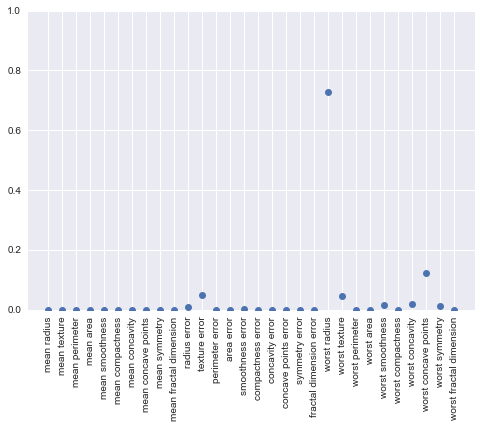

In [27]:
# visualizing the feature importances in similar manner to visalizing the coefficients
# in the linear model.
plt.plot(tree.feature_importances_,'o')
plt.xticks(range(Cancer.data.shape[1]), Cancer.feature_names, rotation = 90)
plt.ylim(0,1)

plt.show()

In [28]:
# Analyzing random forests

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)

In [36]:
X_train, X_test,y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

In [37]:
help (train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int, or None (default is None)
        If float, should be between 0.0 and 1.0 and represent the
        proportion of the dataset to include in the test split. If
        int, represents the absolute number of test samples. If None,
        the value is automatically set to the complement of the train size.
    

In [39]:
forest = RandomForestClassifier(n_estimators = 5, random_state = 2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

In [40]:
help (RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble.forest:

class RandomForestClassifier(ForestClassifier)
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and use averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is always the same as the original
 |  input sample size but the samples are drawn with replacement if
 |  `bootstrap=True` (default).
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators : integer, optional (default=10)
 |      The number of trees in the forest.
 |  
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |      Note: this parameter is tree-specific.
 |  
 |  max_features : int, fl

In [43]:
# Applying the random forest algorithm consisting of 100 trees on the breast cancer datset
X_train, X_test, Y_train, Y_test = train_test_split(Cancer.data, Cancer.target, random_state = 0)
forest = RandomForestClassifier(n_estimators = 100, random_state = 0)

forest.fit(X_train, Y_train)

print ("Accuracy on training set %f" % forest.score(X_train, Y_train))
print ("Accuracy on test set %f" % forest.score(X_test, Y_test))

Accuracy on training set 1.000000
Accuracy on test set 0.972028


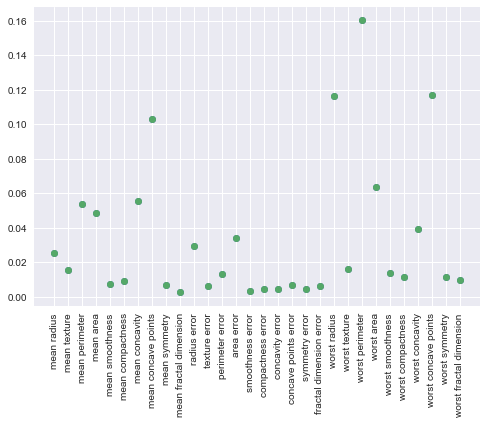

In [45]:
# feature importance provided by the random forest are more reliable than the 
# ones provided by a single tree

plt.plot(forest.feature_importances_,'o')
plt.xticks(range(Cancer.data.shape[1]), Cancer.feature_names, rotation = 90)
plt.show()

In [46]:
# gradient boosted regression tree
# Applying this on our breast_cancer_dataset, using 100 trees of maximum depth three are used
# with learning rate of 0.1

from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, Y_train, Y_test = train_test_split(Cancer.data, Cancer.target, random_state = 0)

gbrt = GradientBoostingClassifier(random_state =0)
gbrt.fit(X_train, Y_train)

print ("Accuracy on training set: %f" % gbrt.score(X_train, Y_train))
print ("Accuracy on test set: %f" % gbrt.score(X_test, Y_test))

Accuracy on training set: 1.000000
Accuracy on test set: 0.958042


In [47]:
# As the training set accuracy is 100% we are likely to be overfitting.
# To reduce overfitting we could either apply stronger pre-pruning by limiting
# the maximum depth or lower the learning rate.

gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1)
gbrt.fit(X_train, Y_train)

print ("Accuracy on training set: %f" % gbrt.score(X_train, Y_train))
print ("Accuracy on test set: %f" % gbrt.score(X_test, Y_test))

Accuracy on training set: 0.990610
Accuracy on test set: 0.972028


In [48]:
help (GradientBoostingClassifier)

Help on class GradientBoostingClassifier in module sklearn.ensemble.gradient_boosting:

class GradientBoostingClassifier(BaseGradientBoosting, sklearn.base.ClassifierMixin)
 |  Gradient Boosting for classification.
 |  
 |  GB builds an additive model in a
 |  forward stage-wise fashion; it allows for the optimization of
 |  arbitrary differentiable loss functions. In each stage ``n_classes_``
 |  regression trees are fit on the negative gradient of the
 |  binomial or multinomial deviance loss function. Binary classification
 |  is a special case where only a single regression tree is induced.
 |  
 |  Read more in the :ref:`User Guide <gradient_boosting>`.
 |  
 |  Parameters
 |  ----------
 |  loss : {'deviance', 'exponential'}, optional (default='deviance')
 |      loss function to be optimized. 'deviance' refers to
 |      deviance (= logistic regression) for classification
 |      with probabilistic outputs. For loss 'exponential' gradient
 |      boosting recovers the AdaBoost a

In [49]:
gbrt = GradientBoostingClassifier(random_state = 0, learning_rate = 0.01)
gbrt.fit(X_train, Y_train)

print ("Accuracy on training set: %f" % gbrt.score(X_train, Y_train))
print ("Accuracy on test set: %f" % gbrt.score(X_test, Y_test))

Accuracy on training set: 0.988263
Accuracy on test set: 0.965035


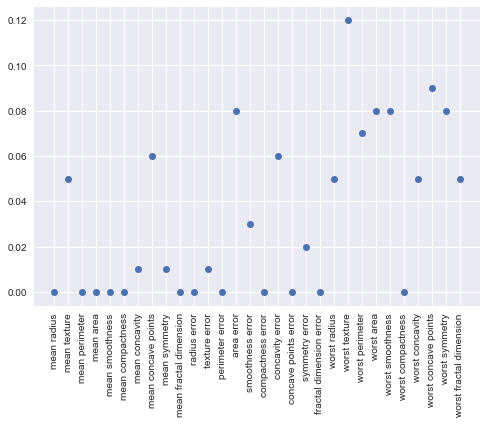

In [55]:
# visualizing the feature importances to get more insight into our model.

gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1)
gbrt.fit(X_train, Y_train)

plt.plot(gbrt.feature_importances_, 'o')
plt.xticks(range(Cancer.data.shape[1]), Cancer.feature_names, rotation = 90)

plt.show()

In [58]:
help (np.hstack)

Help on function hstack in module numpy.core.shape_base:

hstack(tup)
    Stack arrays in sequence horizontally (column wise).
    
    Take a sequence of arrays and stack them horizontally to make
    a single array. Rebuild arrays divided by `hsplit`.
    
    This function continues to be supported for backward compatibility, but
    you should prefer ``np.concatenate`` or ``np.stack``. The ``np.stack``
    function was added in NumPy 1.10.
    
    Parameters
    ----------
    tup : sequence of ndarrays
        All arrays must have the same shape along all but the second axis.
    
    Returns
    -------
    stacked : ndarray
        The array formed by stacking the given arrays.
    
    See Also
    --------
    stack : Join a sequence of arrays along a new axis.
    vstack : Stack arrays in sequence vertically (row wise).
    dstack : Stack arrays in sequence depth wise (along third axis).
    concatenate : Join a sequence of arrays along an existing axis.
    hsplit : Split a

In [59]:
help (plt.figure())

Help on Figure in module matplotlib.figure object:

class Figure(matplotlib.artist.Artist)
 |  The Figure instance supports callbacks through a *callbacks*
 |  attribute which is a :class:`matplotlib.cbook.CallbackRegistry`
 |  instance.  The events you can connect to are 'dpi_changed', and
 |  the callback will be called with ``func(fig)`` where fig is the
 |  :class:`Figure` instance.
 |  
 |  *patch*
 |     The figure patch is drawn by a
 |     :class:`matplotlib.patches.Rectangle` instance
 |  
 |  *suppressComposite*
 |     For multiple figure images, the figure will make composite
 |     images depending on the renderer option_image_nocomposite
 |     function.  If suppressComposite is True|False, this will
 |     override the renderer.
 |  
 |  Method resolution order:
 |      Figure
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getstate__(self)
 |  
 |  __init__(self, figsize=None, dpi=None, facecolor=None, edgecolor=None, li

In [60]:
help (np.linspace)

Help on function linspace in module numpy.core.function_base:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    Parameters
    ----------
    start : scalar
        The starting value of the sequence.
    stop : scalar
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is the last sample. Otherwise, it is not included.
        Default is True.
    retstep : bo

In [61]:
help (np.meshgrid)

Help on function meshgrid in module numpy.lib.function_base:

meshgrid(*xi, **kwargs)
    Return coordinate matrices from coordinate vectors.
    
    Make N-D coordinate arrays for vectorized evaluations of
    N-D scalar/vector fields over N-D grids, given
    one-dimensional coordinate arrays x1, x2,..., xn.
    
    .. versionchanged:: 1.9
       1-D and 0-D cases are allowed.
    
    Parameters
    ----------
    x1, x2,..., xn : array_like
        1-D arrays representing the coordinates of a grid.
    indexing : {'xy', 'ij'}, optional
        Cartesian ('xy', default) or matrix ('ij') indexing of output.
        See Notes for more details.
    
        .. versionadded:: 1.7.0
    sparse : bool, optional
        If True a sparse grid is returned in order to conserve memory.
        Default is False.
    
        .. versionadded:: 1.7.0
    copy : bool, optional
        If False, a view into the original arrays are returned in order to
        conserve memory.  Default is True.  P

In [62]:
help (plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)
    Make a scatter plot of `x` vs `y`
    
    Marker size is scaled by `s` and marker color is mapped to `c`
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data
    
    s : scalar or array_like, shape (n, ), optional
        size in points^2.  Default is `rcParams['lines.markersize'] ** 2`.
    
    c : color, sequence, or sequence of color, optional, default: 'b'
        `c` can be a single color format string, or a sequence of color
        specifications of length `N`, or a sequence of `N` numbers to be
        mapped to colors using the `cmap` and `norm` specified via kwargs
        (see below). Note that `c` should not be a single numeric RGB or
        RGBA sequence because that is indistinguishable from an array 

In [64]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers = 4, random_state = 8)

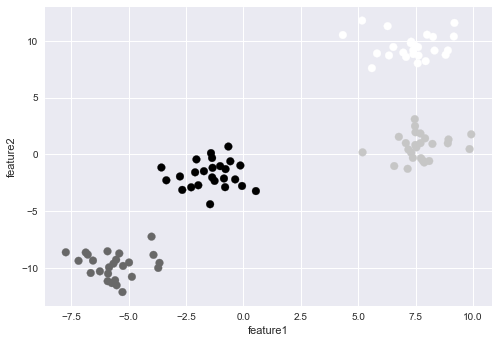

In [66]:
Y = y** 2
plt.scatter(X[:, 0], X[:,1], c = y, s = 60)
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.show()

In [67]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X,y)

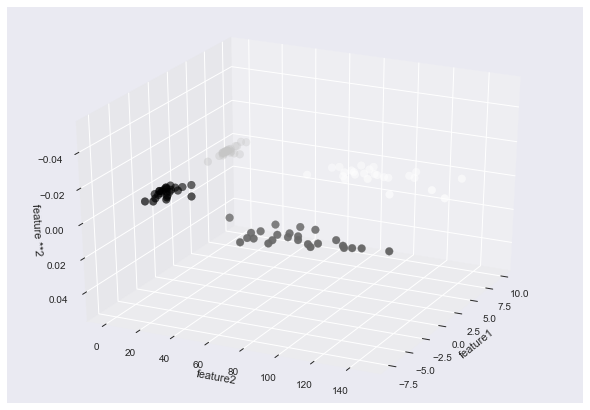

In [69]:
X_new = np.hstack([X, X[:,1:]** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D

ax = Axes3D(figure, elev = -152, azim = -26)
ax.scatter(X_new[:,0], X_new[:,2], c = y, s = 60)
ax.set_xlabel('feature1')
ax.set_ylabel('feature2')
ax.set_zlabel('feature **2')
plt.show()

In [83]:
X_new = np.hstack([X, X[:,1:]** 2])

from sklearn.svm import LinearSVC

linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev = -152, azim = -26)
xx = np.linspace(X_new[:,0].min(), X_new[:,0].max(), 50)
yy = np.linspace(X_new[:,0].min(), X_new[:,0].max(), 50)

XX, YY = np.meshgrid(xx,yy, sparse = True)
ZZ = (coef[0]* XX + coef[1] * YY + intercept)/  -coef[2]
ax.scatter(X_new[:,0], X_new[:,1], X_new[:,2], c = y, s = 60)
ax.plot_surface(xx,yy,ZZ, rstride = 8, alpha = 0.3)

ax.set_xlabel('feature1')
ax.set_ylabel('feature2')
ax.set_zlabel('feature1**2')

plt.show()

ValueError: operands could not be broadcast together with shapes (50,50) (4,) 

In [82]:
help (np.meshgrid)

Help on function meshgrid in module numpy.lib.function_base:

meshgrid(*xi, **kwargs)
    Return coordinate matrices from coordinate vectors.
    
    Make N-D coordinate arrays for vectorized evaluations of
    N-D scalar/vector fields over N-D grids, given
    one-dimensional coordinate arrays x1, x2,..., xn.
    
    .. versionchanged:: 1.9
       1-D and 0-D cases are allowed.
    
    Parameters
    ----------
    x1, x2,..., xn : array_like
        1-D arrays representing the coordinates of a grid.
    indexing : {'xy', 'ij'}, optional
        Cartesian ('xy', default) or matrix ('ij') indexing of output.
        See Notes for more details.
    
        .. versionadded:: 1.7.0
    sparse : bool, optional
        If True a sparse grid is returned in order to conserve memory.
        Default is False.
    
        .. versionadded:: 1.7.0
    copy : bool, optional
        If False, a view into the original arrays are returned in order to
        conserve memory.  Default is True.  P